<a href="https://colab.research.google.com/github/youcine/Prodigy_infoTech_internship/blob/main/task_4_Prodigy_infoTech_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
column_names = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']
df = pd.read_csv('/content/drive/MyDrive/Prodigy infoTech internship/task_4/twitter_training.csv', header=None, names=column_names)

## **Data Exploration**

In [67]:
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [68]:
df.isnull().sum()

Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64

In [69]:
df = df.dropna()

In [70]:
df.isnull().sum()

Tweet ID         0
entity           0
sentiment        0
Tweet content    0
dtype: int64

In [55]:
df.dtypes

Tweet ID          int64
entity           object
sentiment        object
Tweet content    object
dtype: object

In [71]:
df.shape

(73996, 4)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       73996 non-null  int64 
 1   entity         73996 non-null  object
 2   sentiment      73996 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [73]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.count()

Tweet ID         2340
entity           2340
sentiment        2340
Tweet content    2340
dtype: int64

In [74]:
df = df.drop_duplicates()

In [75]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.count()

Tweet ID         0
entity           0
sentiment        0
Tweet content    0
dtype: int64

In [76]:
df.shape

(71656, 4)

In [77]:
# Count of unique entities
game_counts = df['entity'].value_counts()
print(game_counts)

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                            

# **Sentiment Analysis**

In [79]:
df['sentiment'].value_counts()

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: sentiment, dtype: int64

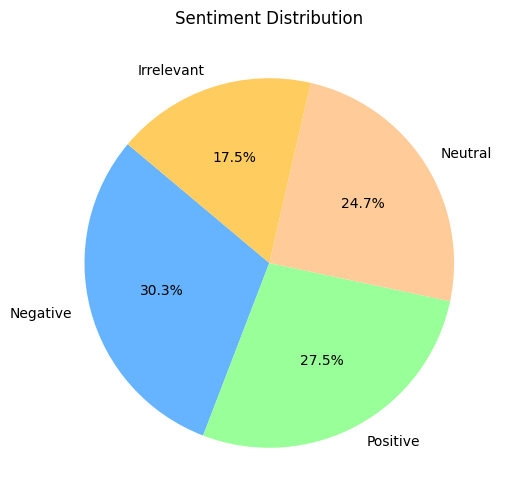

In [81]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ffcc60'])
plt.title('Sentiment Distribution')
plt.show()


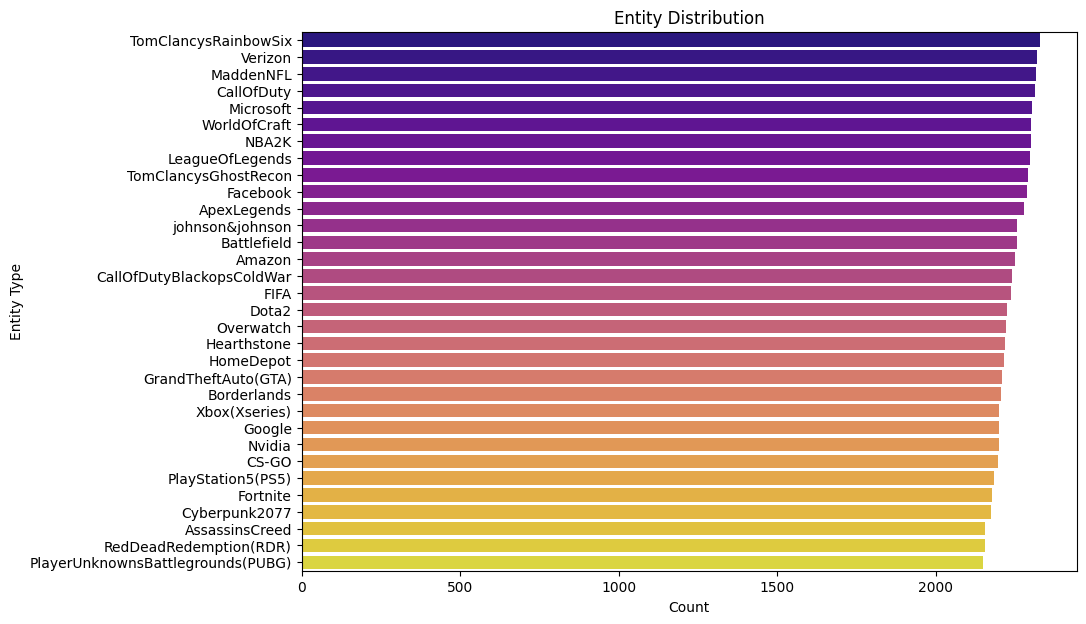

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming entities_df is your DataFrame with columns 'Entity' and 'Entity Type'
plt.figure(figsize=(10, 7))
sns.barplot(x=df['entity'].value_counts().values, y=df['entity'].value_counts().index, palette='plasma')
plt.xlabel('Count')
plt.ylabel('Entity Type')
plt.title('Entity Distribution')
plt.show()


<Figure size 1200x600 with 0 Axes>

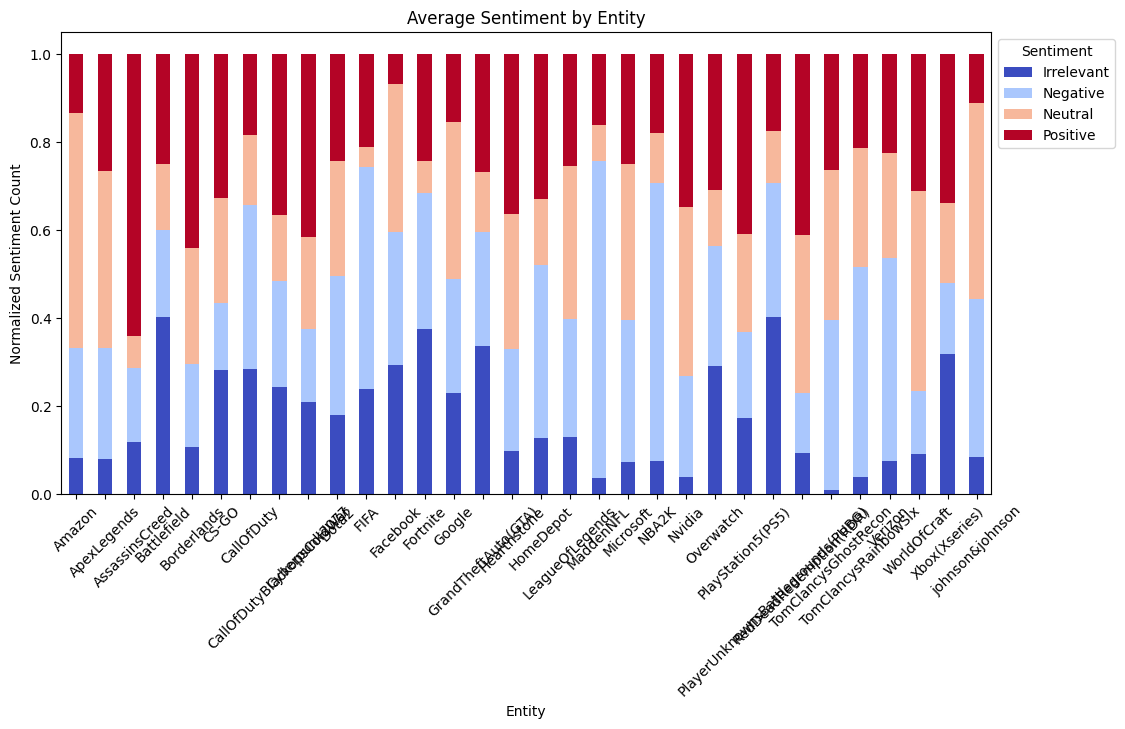

In [88]:
plt.figure(figsize=(12, 6))
average_sentiment_by_entity = df.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Entity')
plt.ylabel('Normalized Sentiment Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


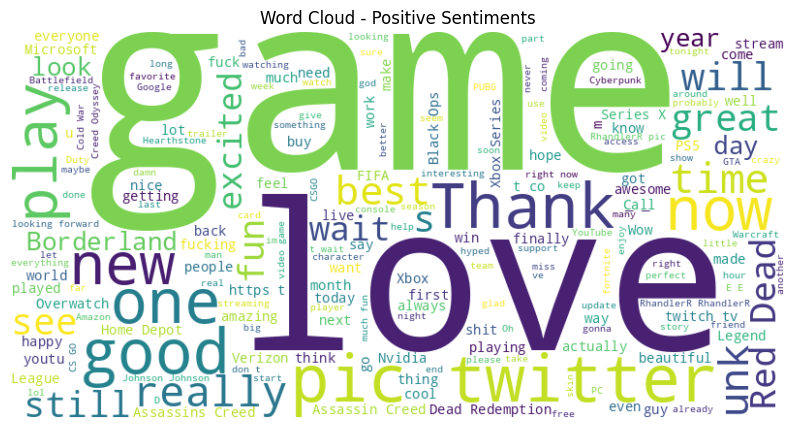

In [84]:
from wordcloud import WordCloud

# Create a WordCloud for positive sentiments
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['Tweet content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiments')
plt.show()


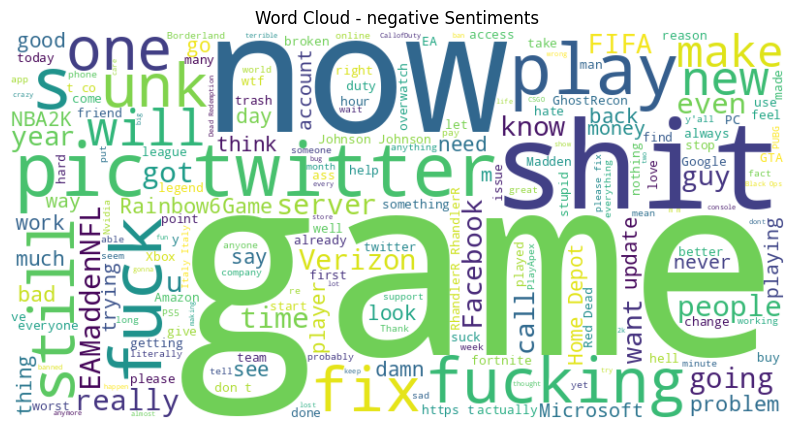

In [86]:
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['Tweet content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - negative Sentiments')
plt.show()


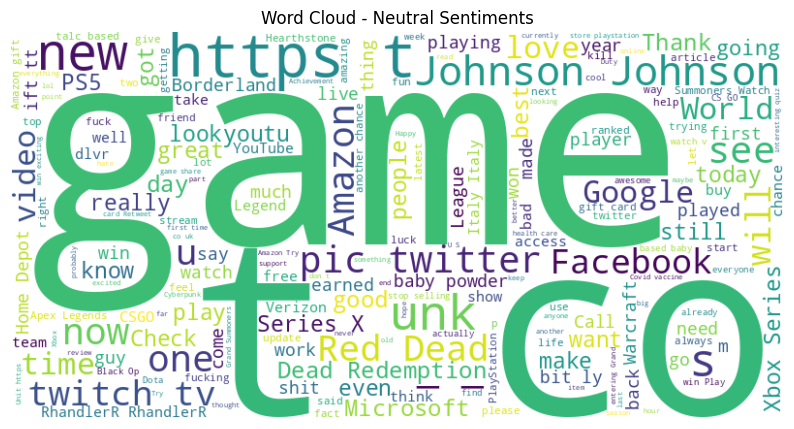

In [89]:
Neutral_text = ' '.join(df[df['sentiment'] == 'Neutral']['Tweet content'])
wordcloud_Neutral = WordCloud(width=800, height=400, background_color='white').generate(Neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_Neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Neutral Sentiments')
plt.show()